#Logistic Regression

### Cloning the Repository with the dataset

In [1]:
!git clone https://github.com/Yuvnish017/Machine_Learning.git

Cloning into 'Machine_Learning'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 26 (delta 2), reused 25 (delta 1), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
%cd /content/Machine_Learning/Logistic_Regression/

/content/Machine_Learning/Logistic_Regression


###Importing Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.inspection import permutation_importance
from mlxtend.feature_selection import SequentialFeatureSelector
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###Loading the Dataset

In [4]:
data = pd.read_csv('framingham.csv')

In [5]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


###Dropping Rows with Null Values and Duplicate Rows

In [7]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB
None


###Correlation Matrix

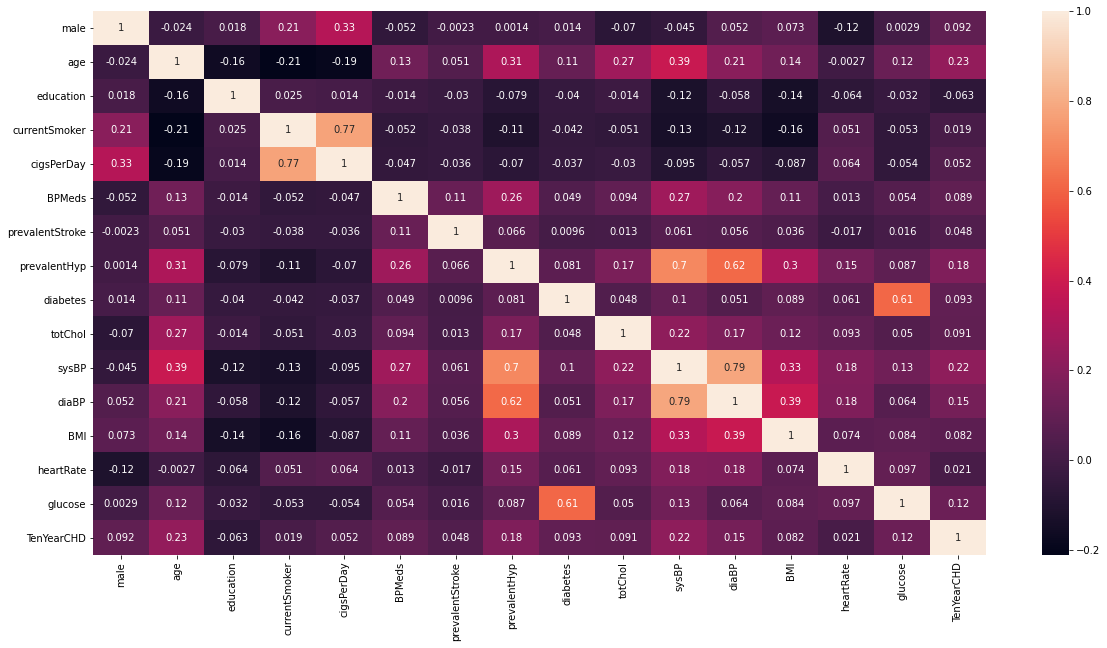

In [8]:
figure = plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

###Sampling the data for balancing the dataset

In [9]:
data = data.groupby('TenYearCHD').sample(2500, replace=True)

In [10]:
y = data.pop('TenYearCHD')
x = data[:]

In [11]:
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3917,0,44,2.0,1,10.0,0.0,0,0,0,222.0,130.0,86.0,27.42,100.0,84.0
1882,0,38,2.0,0,0.0,0.0,0,0,0,251.0,126.0,76.0,29.19,60.0,66.0
3091,1,53,3.0,1,20.0,0.0,0,1,0,204.0,152.0,74.0,24.80,78.0,89.0
2185,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0
2966,1,54,3.0,0,0.0,0.0,0,1,0,248.0,155.0,92.5,29.86,85.0,66.0


In [12]:
y.head()

3917    0
1882    0
3091    0
2185    0
2966    0
Name: TenYearCHD, dtype: int64

Standardizing the Independent Variables

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

### Splitting the dataset into Train and Test Set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4000, 15)
(4000,)
(1000, 15)
(1000,)


###Data Distribution in Train and Test Set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


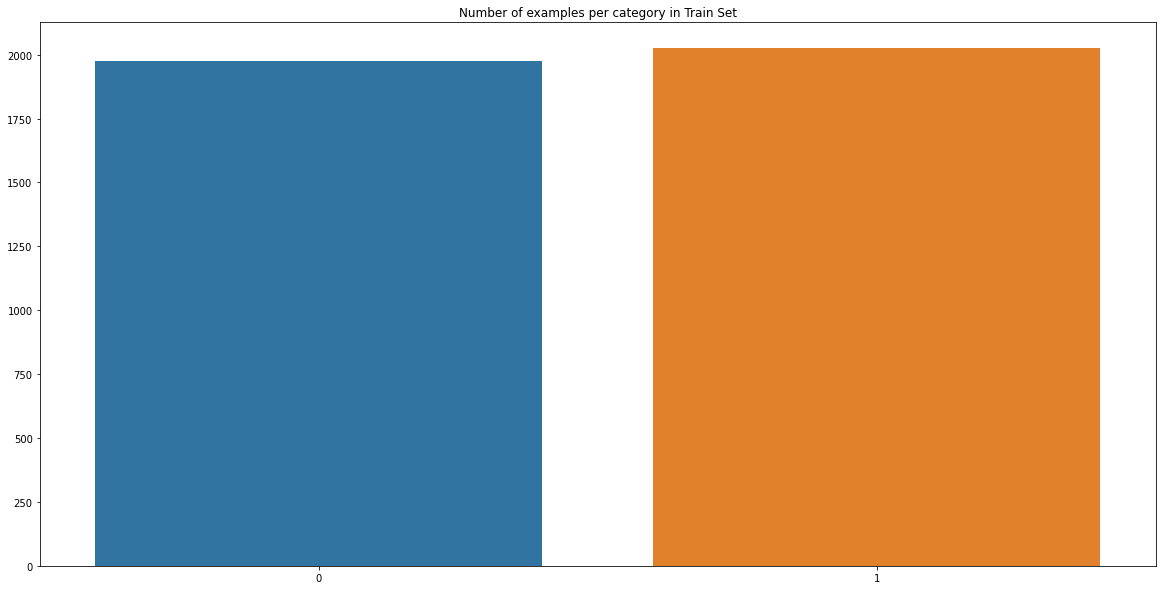

In [ ]:
unique_train, count_train = np.unique(y_train, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(unique_train, count_train).set_title('Number of examples per category in Train Set')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


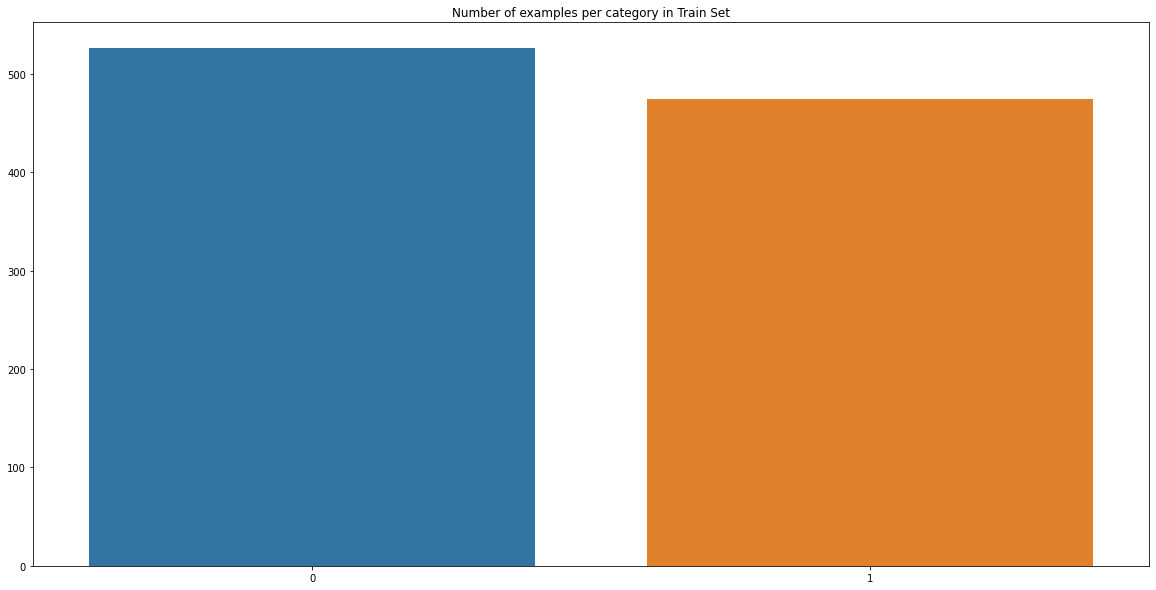

In [ ]:
unique_test, count_test = np.unique(y_test, return_counts=True)
figure = plt.figure(figsize=(20, 10))
sns.barplot(unique_test, count_test).set_title('Number of examples per category in Train Set')
plt.show()

### Training the First Model with all the features

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred_train = clf.predict(x_train)
ypred_test = clf.predict(x_test)
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.6635
0.688


###Classification Report

In [ ]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       526
           1       0.66      0.72      0.68       474

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



###Confusion Matrix

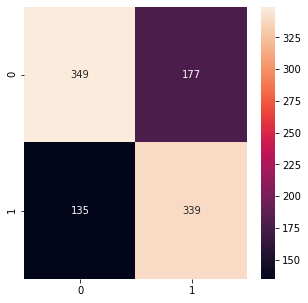

In [ ]:
matrix = confusion_matrix(y_test, ypred_test)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

###AUC-ROC Curve

In [ ]:
ypred_test_prob = clf.predict_proba(x_test)

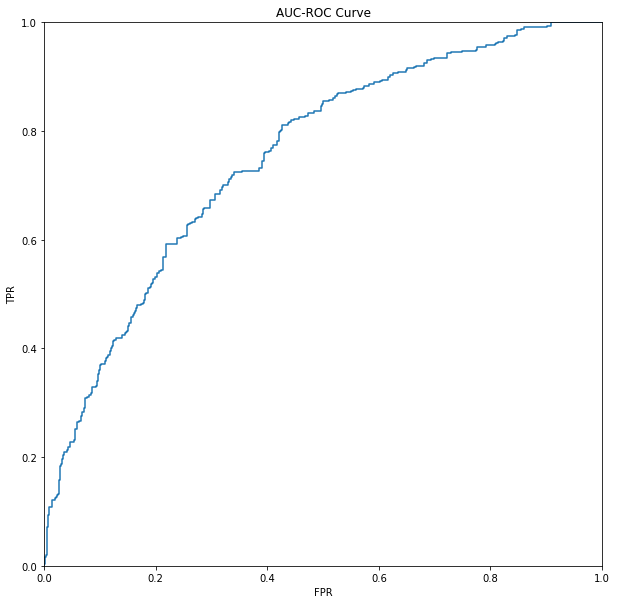

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, ypred_test_prob[:,1])
figure = plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.xlim([0,1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, ypred_test_prob[:,1])

0.7512714379682662

### Feature Selection - Backward Elimination

In [ ]:
bfs = SequentialFeatureSelector(clf, k_features='best', forward=False, n_jobs=-1)
bfs.fit(x_train, y_train)
features = list(bfs.k_feature_names_)
print(features)

['1', '4', '7', '8', '9', '10', '12', '13', '14']


In [ ]:
data = pd.read_csv('framingham.csv')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
print(data.info())
data = data.groupby('TenYearCHD').sample(2500, replace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB
None


In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2534,1,50,1.0,0,0.0,0.0,0,1,0,167.0,159.0,95.0,25.20,75.0,87.0,0
1552,0,46,1.0,1,20.0,0.0,0,0,0,182.0,117.0,78.0,22.15,72.0,59.0,0
3280,0,66,3.0,1,20.0,0.0,0,0,0,241.0,112.0,66.0,23.36,75.0,74.0,0
1207,0,41,4.0,0,0.0,0.0,0,0,0,205.0,110.0,69.0,25.99,75.0,67.0,0
3999,1,54,3.0,1,20.0,0.0,0,1,0,298.0,133.0,84.0,25.59,90.0,94.0,0


###Dropping Less Important Features

In [ ]:
data = data.drop(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'diaBP'], axis=1)

In [ ]:
data.head()

,age,cigsPerDay,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
2534,50,0.0,1,0,167.0,159.0,25.20,75.0,87.0,0
1552,46,20.0,0,0,182.0,117.0,22.15,72.0,59.0,0
3280,66,20.0,0,0,241.0,112.0,23.36,75.0,74.0,0
1207,41,0.0,0,0,205.0,110.0,25.99,75.0,67.0,0
3999,54,20.0,1,0,298.0,133.0,25.59,90.0,94.0,0


###Training Model 2

In [ ]:
y = data.pop('TenYearCHD')
x = data[:]
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf_fs = LogisticRegression()
clf_fs.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
ypred_train = clf_fs.predict(x_train)
ypred_test = clf_fs.predict(x_test)
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.6655
0.701


In [ ]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71       501
           1       0.71      0.67      0.69       499

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



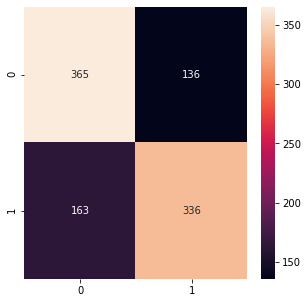

In [ ]:
matrix = confusion_matrix(y_test, ypred_test)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

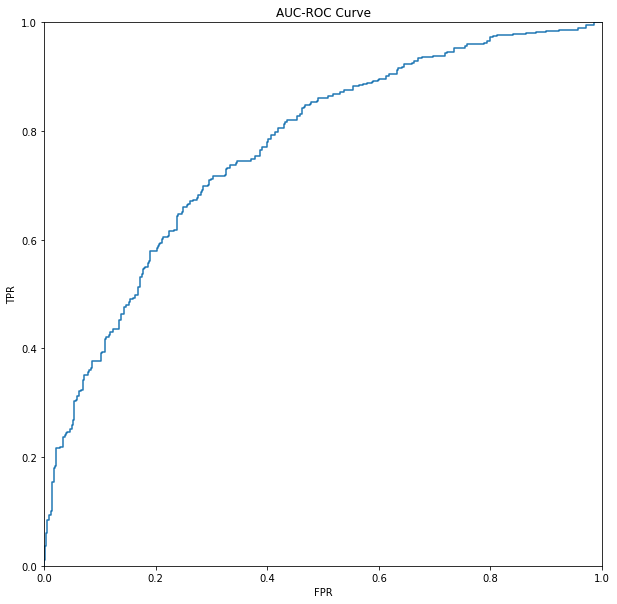

In [ ]:
ypred_test_prob = clf_fs.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, ypred_test_prob[:,1])
figure = plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.xlim([0,1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, ypred_test_prob[:,1])

0.7670070680282722

###Backward Elimination using P-value approach

In [13]:
def backward(data, target, sl=0.05):
  features = data.columns.tolist()
  while len(features)>0:
    features_with_constant = sm.add_constant(data[features])
    p_values = sm.Logit(target, features_with_constant).fit().pvalues[1:]
    max_p_value = p_values.max()
    if max_p_value>sl:
      excluded_feature = p_values.idxmax()
      features.remove(excluded_feature)
    else:
      break
  return features

In [14]:
backward(x, y)

Optimization terminated successfully.
         Current function value: 0.603833
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603835
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603889
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603994
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604094
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604335
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.604609
         Iterations 6


['male',
 'age',
 'education',
 'cigsPerDay',
 'prevalentStroke',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'glucose']

In [15]:
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3917,0,44,2.0,1,10.0,0.0,0,0,0,222.0,130.0,86.0,27.42,100.0,84.0
1882,0,38,2.0,0,0.0,0.0,0,0,0,251.0,126.0,76.0,29.19,60.0,66.0
3091,1,53,3.0,1,20.0,0.0,0,1,0,204.0,152.0,74.0,24.80,78.0,89.0
2185,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0
2966,1,54,3.0,0,0.0,0.0,0,1,0,248.0,155.0,92.5,29.86,85.0,66.0


### Dropping Less Important Features

In [17]:
x = x.drop(['currentSmoker', 'BPMeds', 'diabetes', 'diaBP', 'BMI', 'heartRate'], axis=1)

In [18]:
x.head()

,male,age,education,cigsPerDay,prevalentStroke,prevalentHyp,totChol,sysBP,glucose
3917,0,44,2.0,10.0,0,0,222.0,130.0,84.0
1882,0,38,2.0,0.0,0,0,251.0,126.0,66.0
3091,1,53,3.0,20.0,0,1,204.0,152.0,89.0
2185,0,45,2.0,3.0,0,0,250.0,130.0,86.0
2966,1,54,3.0,0.0,0,1,248.0,155.0,66.0


In [19]:
y.head()

3917    0
1882    0
3091    0
2185    0
2966    0
Name: TenYearCHD, dtype: int64

In [20]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

###Training Model 3 

In [22]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
ypred_train = clf.predict(x_train)
ypred_test = clf.predict(x_test)
print(accuracy_score(y_train, ypred_train))
print(accuracy_score(y_test, ypred_test))

0.67675
0.664


In [24]:
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       504
           1       0.66      0.66      0.66       496

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



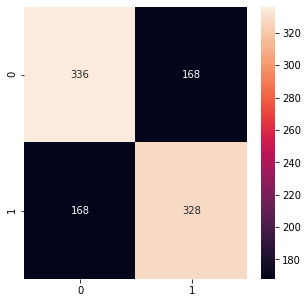

In [25]:
matrix = confusion_matrix(y_test, ypred_test)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

In [26]:
ypred_test_prob = clf.predict_proba(x_test)

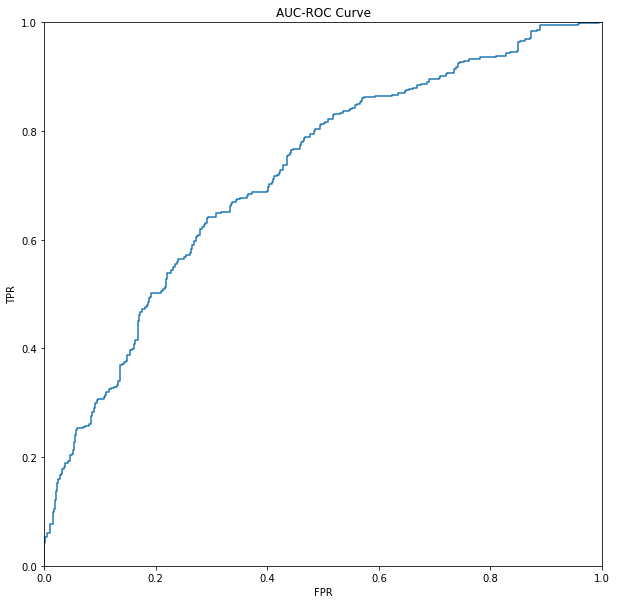

In [27]:
fpr, tpr, threshold = roc_curve(y_test, ypred_test_prob[:,1])
figure = plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr)
plt.xlim([0,1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')
plt.show()

In [28]:
roc_auc_score(y_test, ypred_test_prob[:,1])

0.7186259920634921